In [74]:
import numpy as np
import pandas as pd
import random
import os
from collections import Counter
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_recall_curve
from scipy.stats import beta, dirichlet, alpha
%matplotlib inline
import matplotlib.pyplot as plt



In [48]:
#Creating the vocabulary
def create_vocabulary(start,end):
    vocab = []

    for i in range(start, end):
        path_Name = "./datasets/Q10/part"+str(i)
        file_count = ([f for f in os.walk(path_Name).next()[2] if f[-4:] == ".txt"])
  
        for files in file_count:
            file_Name = path_Name+'/'+files
            my_File = open(file_Name, 'r')
        #Read the file
            read_File = my_File.read()
        #Split the words
            words = read_File.split()
            words.remove('Subject:')
            for word in words:
                vocab.append(word)
    #Using a set will only save the unique words
    #unique_words = set(words)
    #You can then print the set as a whole or loop through the set etc
    dictionary = Counter(vocab)
    dictionary = dictionary.most_common(6000)
    return dictionary


In [26]:
#Finding the overall length
def measure_length(start,end):
    
    overall_length = 0
    for i in range(start, end):
        path_Name = "./datasets/Q10/part"+str(i)
        file_count = ([f for f in os.walk(path_Name).next()[2] if f[-4:] == ".txt"])
        overall_length += len(file_count)  
    return overall_length


In [27]:
#Now to create the frequency matrix
def create_feature(start, end, overall_length):
    dictionary = create_vocabulary(start, end)

    features_matrix = np.zeros((overall_length,len(dictionary)))
    iterate = 0
    for i in range(start, end):
        path_Name = "./datasets/Q10/part"+str(i)
        file_count = ([f for f in os.walk(path_Name).next()[2] if f[-4:] == ".txt"])
        docID = 0;
        for files in file_count:
            file_Name = path_Name+'/'+files
            my_File = open(file_Name, 'r')
        #Read the file
            read_File = my_File.read()
        #Split the words
            words = read_File.split()
            words.remove('Subject:')
            for word in words:
                wordID = 0;
                for i,d in enumerate(dictionary):
                    if d[0] == word:
                    #print "hi"     
                        wordID = i
                        features_matrix[docID,wordID] = words.count(word)
            iterate = iterate + 1
    return features_matrix

In [28]:
#Now to create the frequency matrix
def create_labels(start,end, overall_length):
    
    train_labels = np.zeros(overall_length)
    iterate = 0
    for i in range(start, end):
        path_Name = "./datasets/Q10/part"+str(i)
        file_count = ([f for f in os.walk(path_Name).next()[2] if f[-4:] == ".txt"])
        docID = 0;
        for files in file_count:
            
            if(files.find('spmsg')!=-1):
                train_labels[iterate] = 1 
            iterate = iterate + 1
    return train_labels

In [49]:
overall_length = measure_length(1, 9)
train_matrix = create_feature(1, 9, overall_length)
train_labels = create_labels(1, 9, overall_length)



overall_length = measure_length(9, 11)
test_matrix = create_feature(9, 11, overall_length)
test_labels = create_labels(9, 11, overall_length)





Multinomial NB
[[124   0]
 [ 97   0]]
0.561085972851


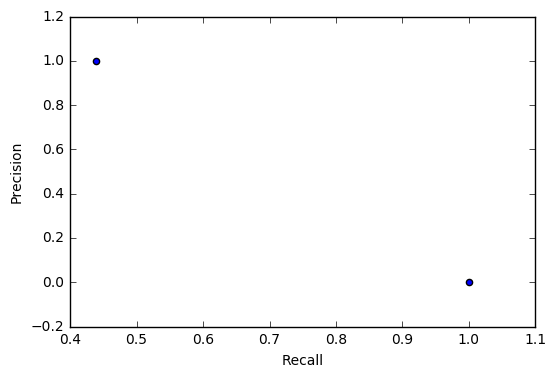

In [51]:
#Multinomial NB
print "Multinomial NB"
model1 = MultinomialNB()
model1.fit(train_matrix,train_labels)
result1 = model1.predict(test_matrix)
print confusion_matrix(test_labels,result1)
print model1.score(test_matrix, test_labels)
precision, recall, thresholds = precision_recall_curve(test_labels, model1.predict(test_matrix))
plt.scatter(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

Bernoulli NB
[[124   0]
 [ 96   1]]
0.565610859729


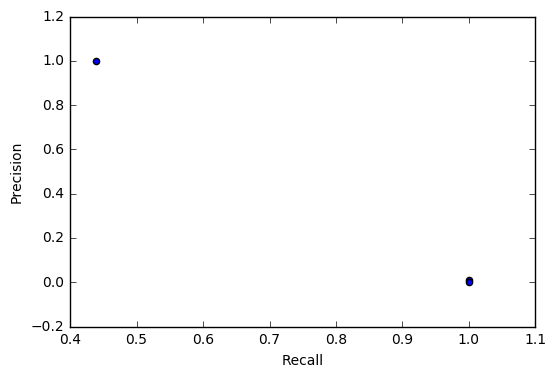

In [52]:
#Bernoulli NB
print "Bernoulli NB"
model1 = BernoulliNB()
model1.fit(train_matrix,train_labels)
result1 = model1.predict(test_matrix)
print confusion_matrix(test_labels,result1)
print model1.score(test_matrix, test_labels)
precision, recall, thresholds = precision_recall_curve(test_labels, model1.predict(test_matrix))
plt.scatter(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [72]:
#If you want to convert it to Beta distribution 
a, b = 3.31, 1.627
train_matrix = beta.pdf(train_matrix, a, b)
test_matrix = beta.pdf(test_matrix, a, b)
test_labels = beta.pdf(test_labels, a, b)
train_labels = beta.pdf(train_labels, a, b)

In [93]:
def calculating_alpha(overall_length, length):
    a = 32
    alpha_a = np.arange(1, overall_length+1)
    alpha = np.zeros(overall_length)
    for i in range(0, overall_length):
            alpha[i] = i+1
    return alpha
alpha = calculating_alpha(878, 6000)


Gaussian NB
[[124   0]
 [ 96   1]]
0.565610859729


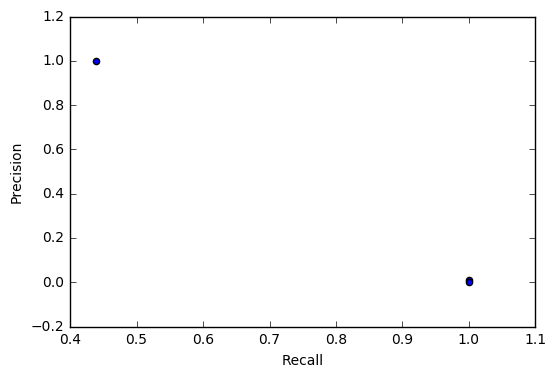

In [47]:
#Gaussian NB
print "Gaussian NB"
model1 = GaussianNB()
model1.fit(train_matrix,train_labels)
result1 = model1.predict(test_matrix)
print confusion_matrix(test_labels,result1)
print model1.score(test_matrix, test_labels)
precision, recall, thresholds = precision_recall_curve(test_labels, model1.predict(test_matrix))
plt.scatter(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()